<a href="https://colab.research.google.com/github/Siddharth1047/Data-Science-Practice/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#creating a dataframe o our dataset
df = pd.read_csv('/content/train.csv')

### EDA

In [ ]:
df.shape

(891, 12)

In [ ]:
# Dataset Preview
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Gimme all the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# How many null values are there in each column?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Conclusion: -
 1. Missing values are in Age, Cabin and Embarked columns
 2. I'll drop column Cabin
 3. I'll input some missing values for Age column 

In [ ]:
# drop 'Cabin'
df.drop(columns = ['Cabin'], inplace = True)
# inplace = True is used when you want to make changes permanent to the dataset

In [ ]:
# Let's input the missing values in column Age using mean
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# putting 'S' in all the missing values in EMbarked column
df['Embarked'].fillna('S', inplace = True)

In [ ]:
# Changing below columns to categorical data
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [ ]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


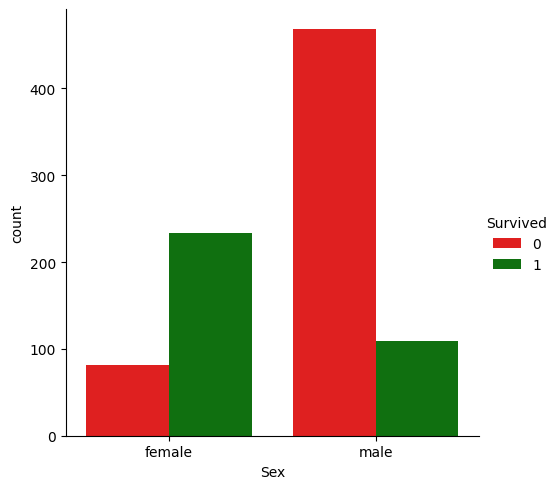

In [ ]:
# Survived column is a binary column, where 0 = Passenger Died and 1 = Passenger Survived
my_palette = {"male": "blue", "female": "pink", 0: "red", 1: "green"}
sns.catplot(x = "Sex", hue = "Survived", kind = "count", data = df, palette = my_palette)
plt.show()

#### Here we can say that many 'Male' passengers died as compared to 'Females'

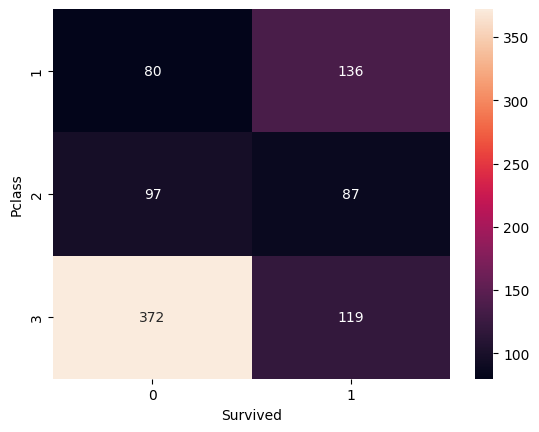

In [ ]:
# Now let's see how many people died based on their Pclass: -
group = df.groupby(['Pclass', 'Survived']) # group the 2 columns together
pclass_survived = group.size().unstack() # unstack them by creating a new dataframe

#create a heatmap
sns.heatmap(pclass_survived, annot = True, fmt = "d")
plt.show()

#### Conclusion: -
1. Class 1 passengers've higher survival rate than class 2 & 3.
2. Higher Pclass = Higher chances of survival.

<Axes: xlabel='Sex', ylabel='Age'>

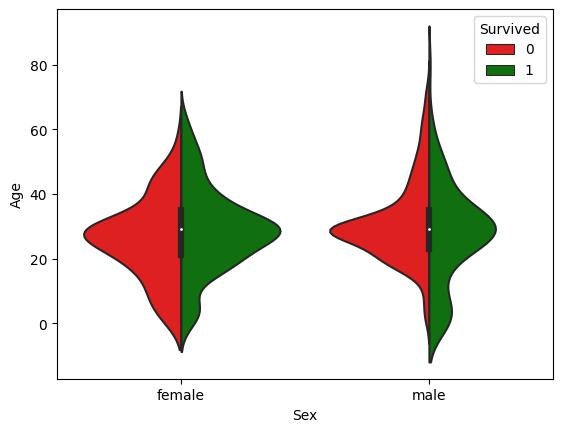

In [ ]:
# Let's create a violin plot to find out the correlation between Age and survival rate
sns.violinplot(x = "Sex", y = "Age", hue = "Survived", data = df, palette = my_palette, split = True)

### Conclusion: -
1. Many children survived.
2. Priority was given to women and children during evacuation. (We know that we all saw the movie. ;)  )
3. Aged men had low survival rate.
4. Death rate of men in the range of 20-40 is highest.
5. Survival rate of women in the range of 20-40 is highest.

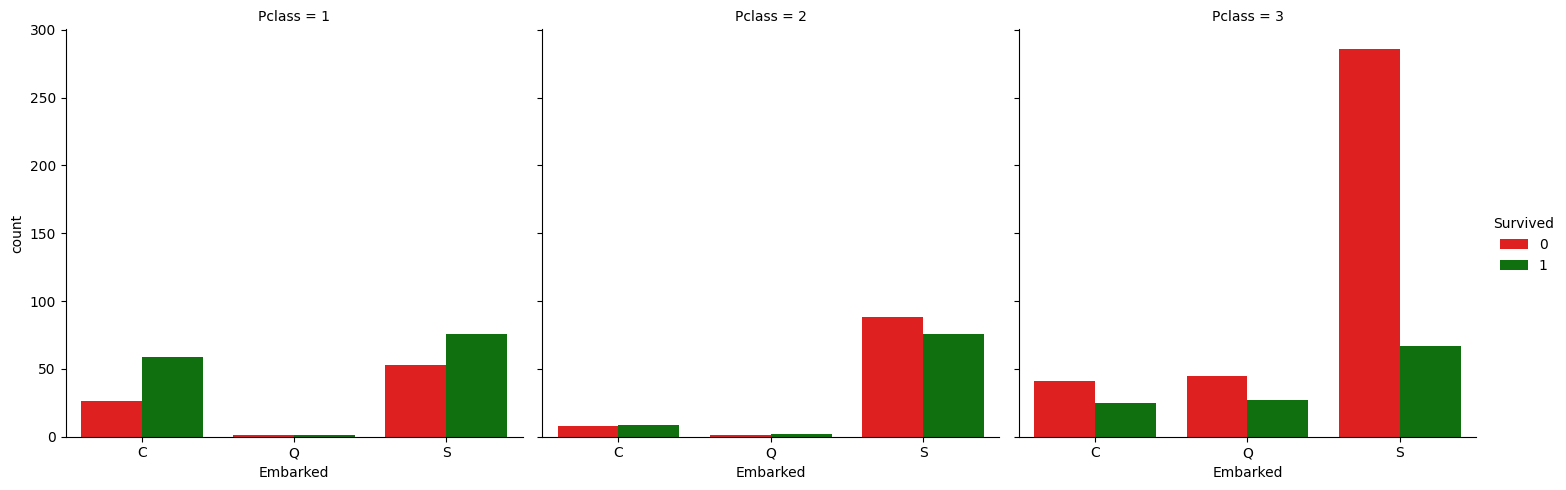

In [ ]:
# Let's see where our passengers were from on the basis of Pclass
# In Embarked column C = Cherbourg, France; Q = Queenstown (now called Cobh), Ireland ; S = Southampton, England
my_palette1 = {0: "red", 1: "green"}
sns.catplot(x = "Embarked", hue = "Survived", kind = "count", col = "Pclass", data = df, palette = my_palette1)
plt.show()

### Conclusion: -
1. Majority of passengers were from 'S'.
2. Most dead people were from Class 3 and located from city 'S'.
3. From 'Q' many Class 3 passengers were present.

#NOTE: -
#### We can make a visualization to see how many people survived based on the fare rate, but at this point we know that survival rate of Class 1 passengers is higher because they paid more as compared to Class 2 & 3.
#### So no need to perform that.

In [ ]:
# Let's see exactly how many people died and how many survived (for curiosity)
survived_count= df[df["Survived"] == 1]["Survived"].count()
deceased_count = df[df["Survived"] == 0]["Survived"].count()

# print
print("Total number of people survived is: ", survived_count)
print("Total number of deceased people is: ", deceased_count)

Total number of people survived is:  342
Total number of deceased people is:  549


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


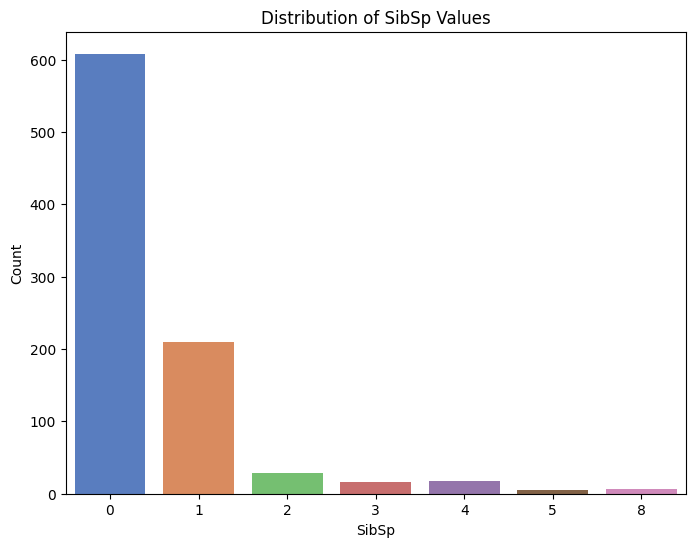

In [ ]:
# I found an interesting column in the titanic dataset by th name of 'SibSp'
# It stands for siblings/spouses. In short the number of relatives are givem.
relatives = df['SibSp'].value_counts()
print(relatives)
# plot it
plt.figure(figsize=(8, 6)) # Adjust figure size
sns.countplot(x="SibSp", data=df, palette="muted", width=0.8) 
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.title("Distribution of SibSp Values")
plt.show()

#### We can see that most people had zero relatives, many people had 1 person with them (couples maybe), values > 1 might mostly consist of siblings or family.

In [ ]:
# Let's find the skewness of some columns: -
print("Skewness of column Age is: ", df['Age'].skew())
print("Skewness of column Fare is: ", df['Fare'].skew())

Skewness of column Age is:  0.45956263424701577
Skewness of column Fare is:  4.787316519674893


### Conclusion: -
1. Age: The skewness value of 0.459 indicates a slight positive skewness, which means that the distribution of ages is slightly skewed towards the younger ages.

2. Fare: The skewness value of 4.787 indicates a significant positive skewness, which means that the distribution of fares is heavily skewed towards higher values.

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
dtype: float64


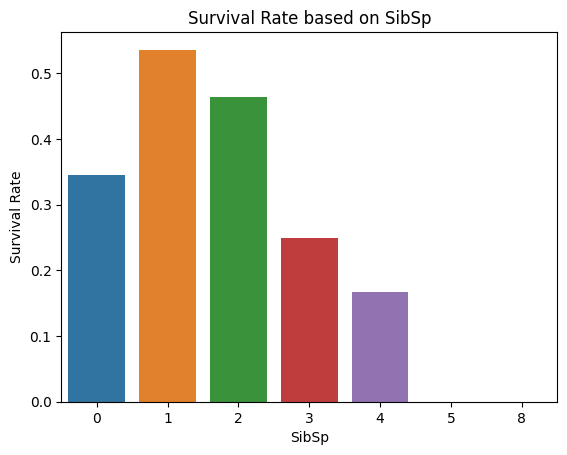

In [ ]:
# Something interesting
sibsp_survived = df.groupby('SibSp')['Survived'].value_counts().unstack()
# calculate the survival rate
sibsp_survival_rate = sibsp_survived[1] / (sibsp_survived[0] + sibsp_survived[1])
print(sibsp_survival_rate)
# plot it
sns.barplot(x=sibsp_survival_rate.index, y=sibsp_survival_rate.values)
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.title('Survival Rate based on SibSp')
plt.show()

### Conclusion: -
1. I thought SibSp values were directly proportional to survival rate, but my hypothesis was prooved as incorrect.
2. Unfortunately if passengers had more siblings/spouses then their rate of survival decreases.
3. For people with siblings > 4, survival rate tends to zero.
4. Highest survival rate belongs to SibSp value '1'. 

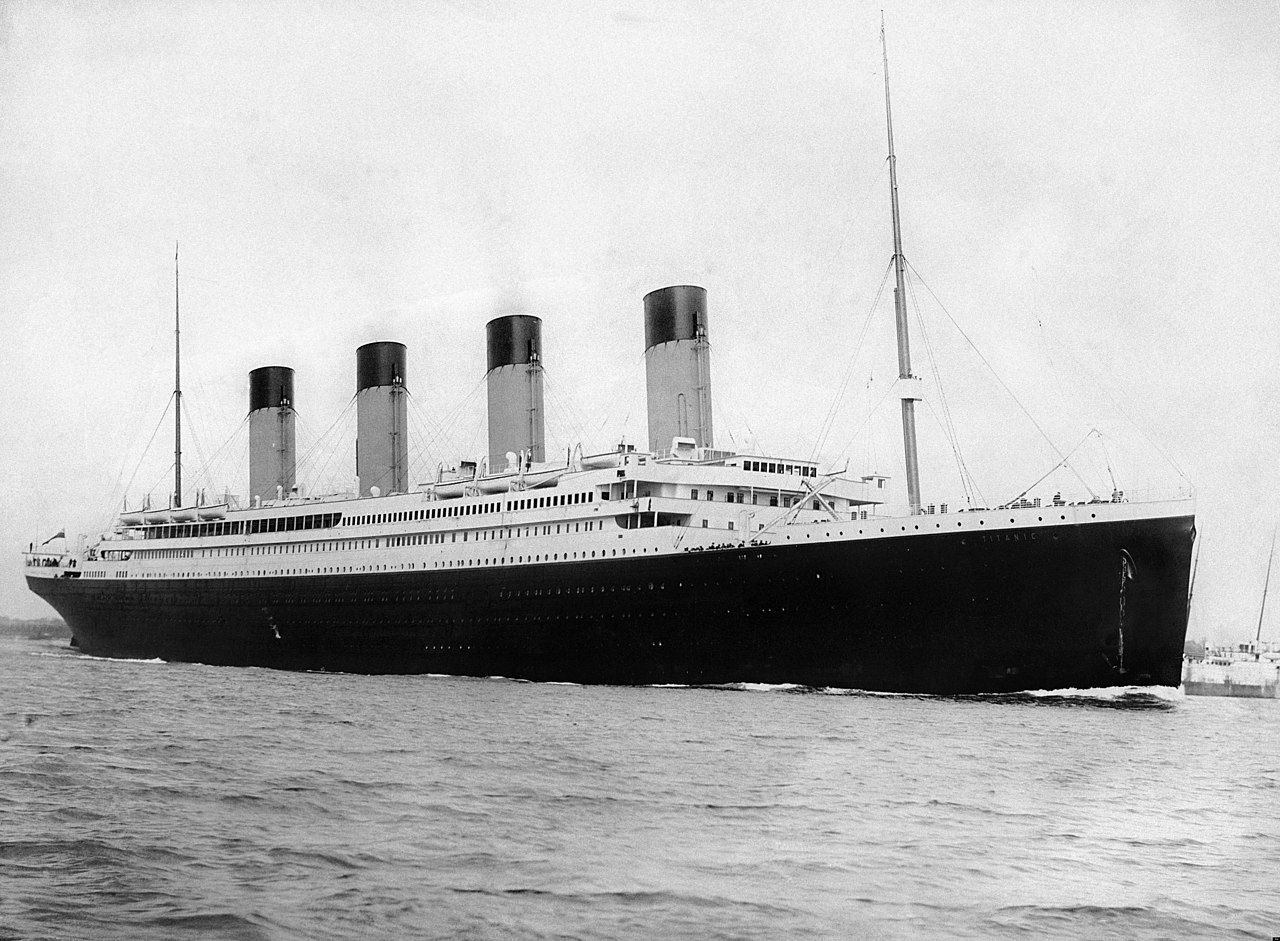

In [ ]:
from PIL import Image
img = Image.open("/content/RMS Titanic.jpg")
img.show()

### Facts about the RMS Titanic: -
1. The Titanic had two sister ships
- Olympic launched 20 October 1910, arrived at Jarrow for scrapping 13 October 1935.
- Britannic launched 26 February 1914, sunk by mine 21 November 1916.

2. There were 20 life boats on board, which would have held a capacity of 1178 people.
Meanwhile the capacity of Titanic was 3320 people.

3. Registered dimensions:
- Length: 852.5 feet
- Length overall: 882.75 feet
- Breadth: 92.5 feet
- Depth: 59.6 feet
- Tonnage: Gross 46,329, Net 21,831

In [ ]:
# EDA on RMS Titanic was fun.